# Indian Car Price Regression Analysis

In [2]:
#importing packages to read in csv files and begin exploratory data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Importing

In [3]:
#reading in data files
df1 = pd.read_csv('Data/CAR DETAILS FROM CAR DEKHO.csv', index_col = 0)
df1.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
name,,,,,,,
Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
#reading in second data file
df2 = pd.read_csv('Data/car data.csv', index_col = 0)
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,,,,,,,,
ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
#reading in third data file, we will use this data set for further analysis as it provides more detail than other two.
df = pd.read_csv('Data/Car details v3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


## Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.describe()

,year,selling_price,km_driven,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393
std,3.863695,8.135827e+05,5.679230e+04,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [10]:
#prices are listed in Indian Rupee and gas mileage metrics are in kilometers - we will convert to USD and MPG
INR_USD = 0.013 #as of 7/16/21
df['selling_price_usd'] = df['selling_price'] * INR_USD

KM_MI = 0.621371 #converting KM to miles
df['mi_driven'] = df['km_driven'] * KM_MI


In [11]:
#converting mileage to mpg
df['mileage'] = [x[:-5] for x in df['mileage']] #removing text
df['mileage'] = df['mileage'].astype(float) #changing type to floats
df['mileage_mpg'] = df['mileage'] / 0.425143707 #kmpl to mpg conversion 

In [12]:
#converting engine and max power to floats
df['engine'] = [x[:-3] for x in df['engine']] #removing text
df['engine'] = df['engine'].astype(float) #changing type to floats
df['max_power'] = [x[:-4] for x in df['max_power']] #removing text
df['max_power'] = df['max_power'].astype(float) #changing type to floats

In [13]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_usd,mi_driven,mileage_mpg
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,5850.0,90409.4805,55.040213
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,4810.0,74564.5200,49.724363
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,2054.0,86991.9400,41.632981
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,2925.0,78914.1170,54.099354
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,1690.0,74564.5200,37.869548


In [14]:
df = df[['name', 'year', 'selling_price_usd', 'mi_driven', 'mileage_mpg', 'fuel', 'seller_type', 'transmission', 'owner', 'engine', 'max_power', 'seats']]

In [15]:
df.head()

,name,year,selling_price_usd,mi_driven,mileage_mpg,fuel,seller_type,transmission,owner,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,5850.0,90409.4805,55.040213,Diesel,Individual,Manual,First Owner,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,4810.0,74564.5200,49.724363,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,2054.0,86991.9400,41.632981,Petrol,Individual,Manual,Third Owner,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,2925.0,78914.1170,54.099354,Diesel,Individual,Manual,First Owner,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,1690.0,74564.5200,37.869548,Petrol,Individual,Manual,First Owner,1298.0,88.20,5.0


## Exploratory Data Analysis

<AxesSubplot:xlabel='year', ylabel='selling_price_usd'>

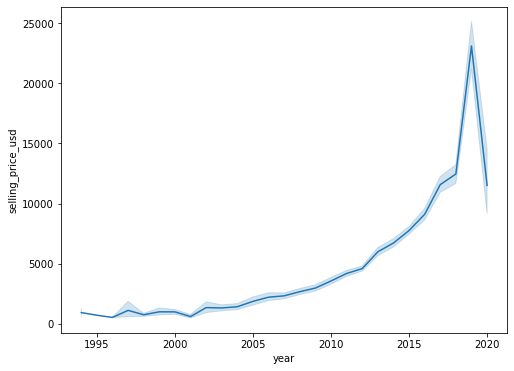

In [17]:
fig, ax = plt.subplots(figsize = (8,6))
sns.lineplot(x = df['year'], y = df['selling_price_usd'])

<AxesSubplot:xlabel='mi_driven', ylabel='selling_price_usd'>

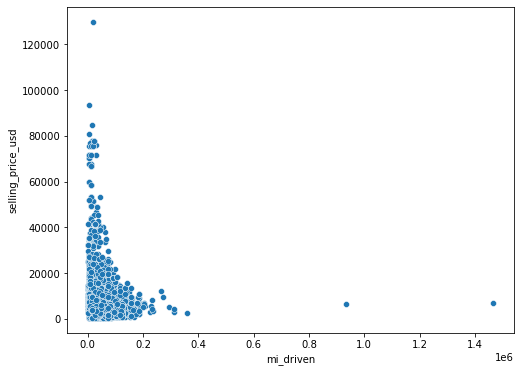

In [27]:
fig, ax = plt.subplots(figsize = (8,6))
sns.scatterplot(x = df['mi_driven'], y = df['selling_price_usd'])

<AxesSubplot:xlabel='selling_price_usd', ylabel='Count'>

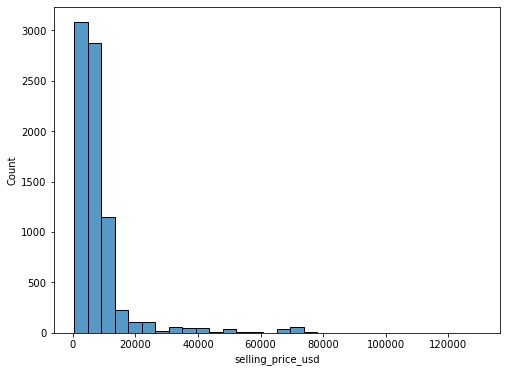

In [23]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(df.selling_price_usd, bins = 30)

<AxesSubplot:xlabel='year', ylabel='Count'>

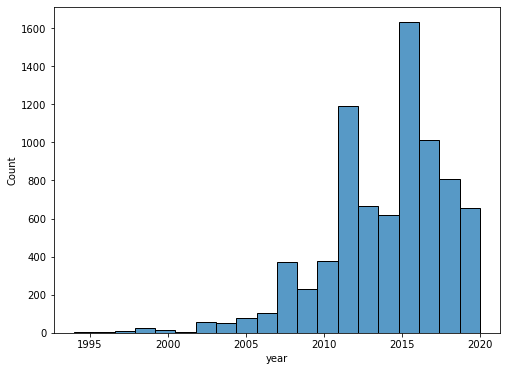

In [24]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(df.year, bins = 20)

<AxesSubplot:xlabel='owner', ylabel='Count'>

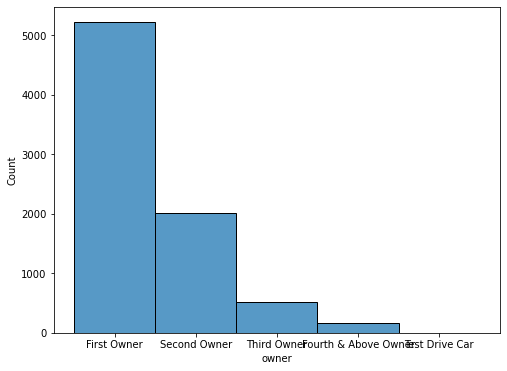

In [29]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(df.owner, bins = 5)

<AxesSubplot:xlabel='transmission', ylabel='Count'>

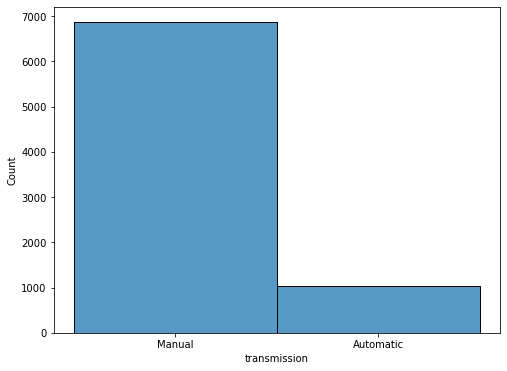

In [38]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(df.transmission)